## IMPORTAÇÕES

In [58]:
import pandas as pd

import seaborn as sns

from scipy.stats import ranksums

import matplotlib.pyplot as plt


## IMPORTAÇÃO BASE DE DADOS

**Variaveis do dataset**

    total_bill -> valor da conta.
    tips -> valor da gorjeta.
    dessert -> se pediu sobremesa
    day -> dia da semana.
    time -> almoço ou janta.
    size -> quantas pessoas estavam na mesa.

In [2]:
dados = pd.read_csv('tips.csv')
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


# TRADUÇÃO

In [3]:
# Traduzindo o nome das colunas.
renomear = {
    'total_bill' : 'valor_da_conta',
     'tip' : 'gorjeta',
     'dessert' : 'sobremesa',
     'day' : 'dia_da_semana',
     'time': 'hora_do_dia',
     'size' : 'total_de_pessoas'
}

dados = dados.rename(columns = renomear)
dados.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [15]:
# Traduzindo a variavel sobremesa.
sim_nao = {
    'No': 'Nao',
    'Yes': 'Sim'
}
dados['sobremesa'] = dados.sobremesa.map(sim_nao)

In [18]:
# Traduzindo a variavel dia_da_semana.

dias = {
    'Sun' : 'Domingo',
    'Sat' : 'Sábado',
    'Thur' : 'Quinta',
    'Fri' : 'Sexta'
}
dados['dia_da_semana'] = dados.dia_da_semana.map(dias)

In [19]:
# Traduzindo a variavel hora_do_dia

hora = {
    'Dinner' : 'Jantar',
    'Lunch' : 'Almoço'
}
dados['hora_do_dia'] = dados.hora_do_dia.map(hora)

# ANALISE 1 - VALOR DA CONTA E GORJETA

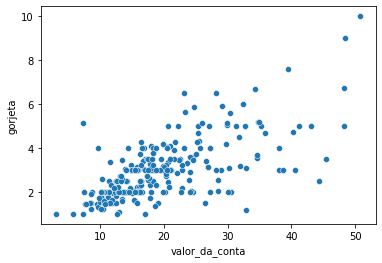

In [7]:
valor_gorjeta = sns.scatterplot(x = 'valor_da_conta', y = 'gorjeta', data = dados)

  
**Visualmente, o valor da gorjeta aumenta conforme o valor da conta**

In [8]:
dados['porcentagem'] = dados['gorjeta'] / dados['valor_da_conta']
dados.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808


In [9]:
dados.porcentagem = dados.porcentagem.round(2)
dados.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,No,Sun,Dinner,2,0.06
1,10.34,1.66,No,Sun,Dinner,3,0.16
2,21.01,3.50,No,Sun,Dinner,3,0.17
3,23.68,3.31,No,Sun,Dinner,2,0.14
4,24.59,3.61,No,Sun,Dinner,4,0.15


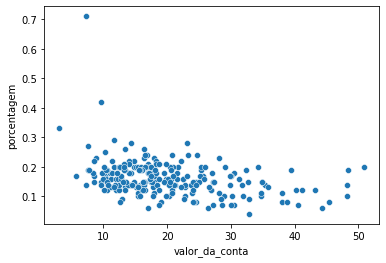

In [10]:
porcentagem_conta = sns.scatterplot(x = 'valor_da_conta', y = 'porcentagem', data = dados)

**Visualmente, o valor da conta não é proporcional ao valor da gorjeta.**

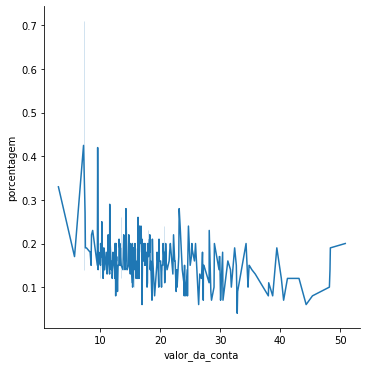

In [11]:
porcentagem_conta_linha = sns.relplot(x = 'valor_da_conta', y = 'porcentagem', kind = 'line', data = dados)

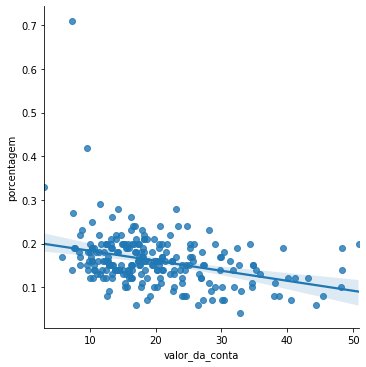

In [12]:
sns.lmplot(x = 'valor_da_conta', y = 'porcentagem', data = dados)

# ANALISE 2 - SOBREMESA

In [23]:
dados[dados.sobremesa == 'Sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [24]:
dados[dados.sobremesa == 'Nao'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


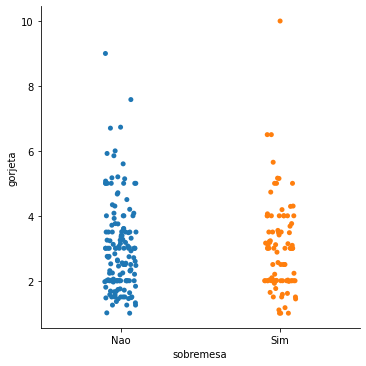

In [25]:
sns.catplot(x='sobremesa', y='gorjeta', data=dados)

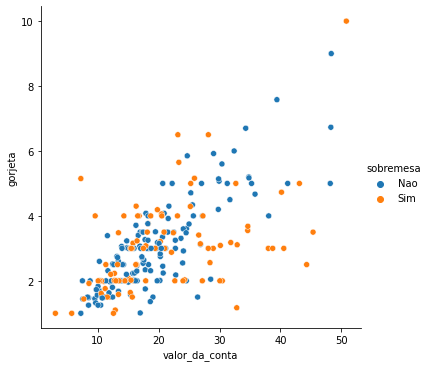

In [26]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', data=dados)

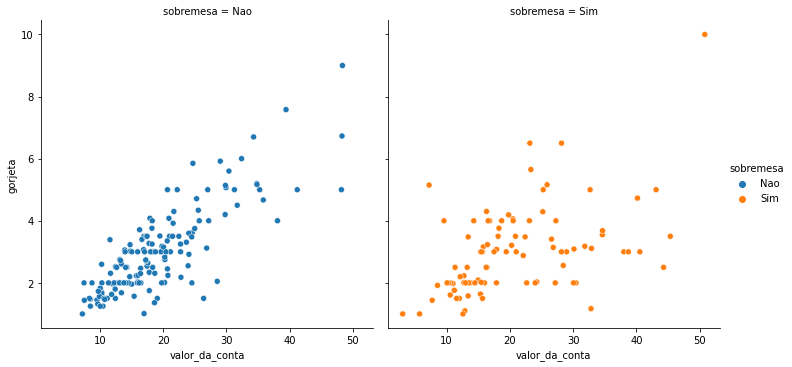

In [28]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa', data=dados)

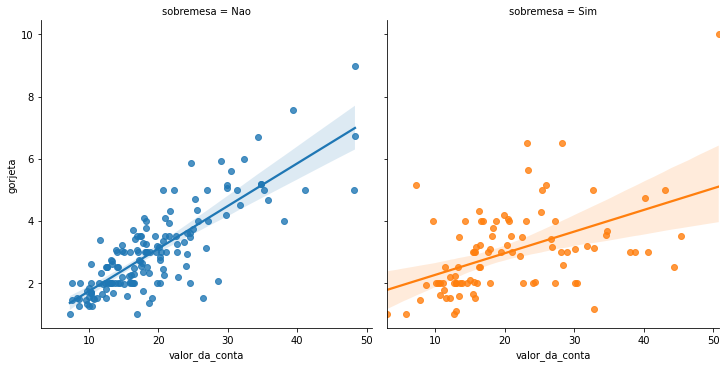

In [30]:
sns.lmplot(x='valor_da_conta', y='gorjeta', col='sobremesa', hue='sobremesa', data=dados)

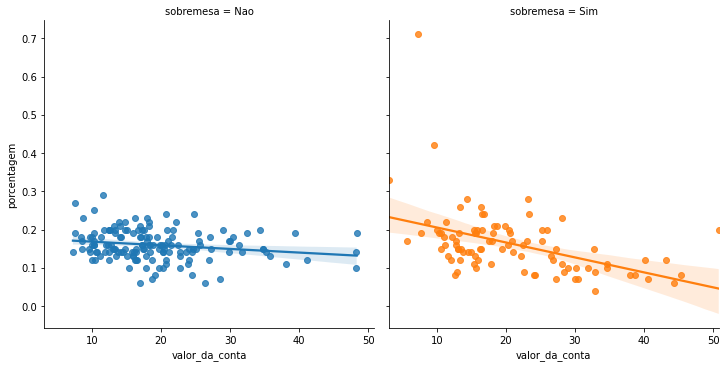

In [31]:
sns.lmplot(x='valor_da_conta', y='porcentagem', col='sobremesa', hue='sobremesa', data=dados)

**Visualmente, exite uma diferença no valor da gorjeta daqueles que pediram sobremesa e não pediram sobremesa.**

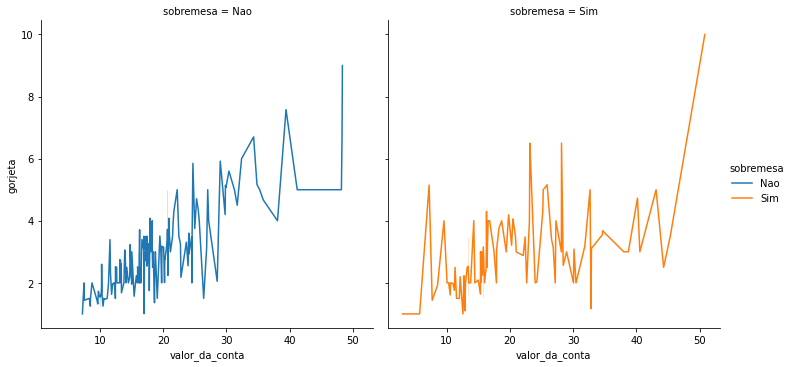

In [32]:
sns.relplot(x='valor_da_conta', y='gorjeta', col='sobremesa', hue='sobremesa', kind='line', data=dados)

# TESTE DE HIPÓTESE

**H<sup>null</sup>**

>**A distribuição da taxa da gorjeta é a mesma nos dois grupos**

**H<sup>alt</sup>**

>**A distribuição da taxa da gorjeta não é a mesma nos dois grupos**

In [47]:
sobremesa = dados.query("sobremesa == 'Sim'")['porcentagem']
sem_sobremesa = dados.query("sobremesa == 'Nao'")['porcentagem']

In [50]:
r = ranksums(sobremesa, sem_sobremesa)
print('O valor do p-value é {}'.format(r.pvalue))

O valor do p-value é 0.5266635660124415


O p-value representa a probabilidade daquela amostra ter acontecido dentro da população. Se a chance é pequena, geralmente p-value < 0,05, representa que um evento muito raro aconteceu, então optamos por descartar a hipótese nula, e dizer que ela pode não ser verdade.

**H<sup>null</sup>**

>**A distribuição da taxa da gorjeta é a mesma nos dois grupos**

# ANALISE 3 - DIA DA SEMANA

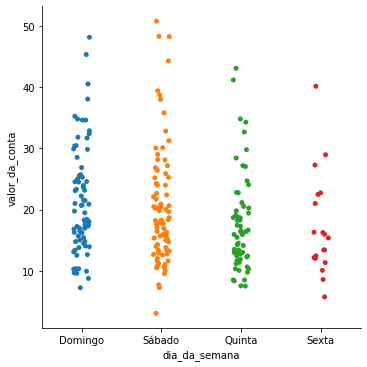

In [52]:
sns.catplot(x='dia_da_semana', y='valor_da_conta', data=dados)

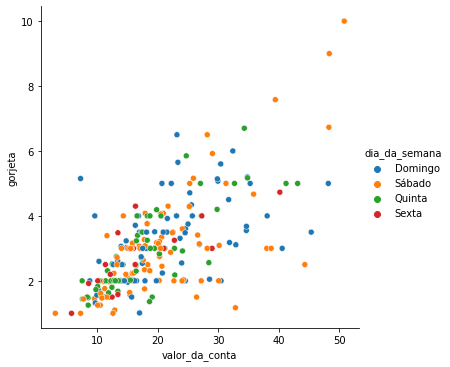

In [54]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', data=dados)

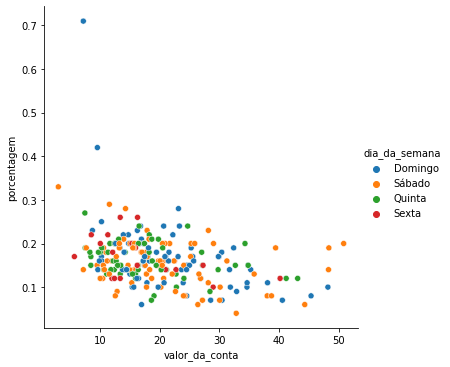

In [55]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', data=dados)

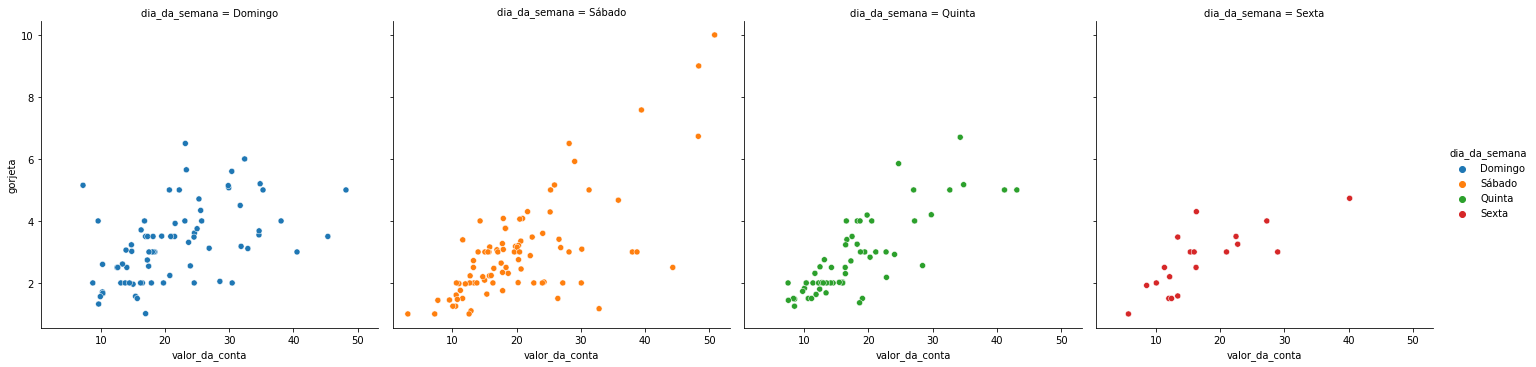

In [63]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', col='dia_da_semana', data=dados)

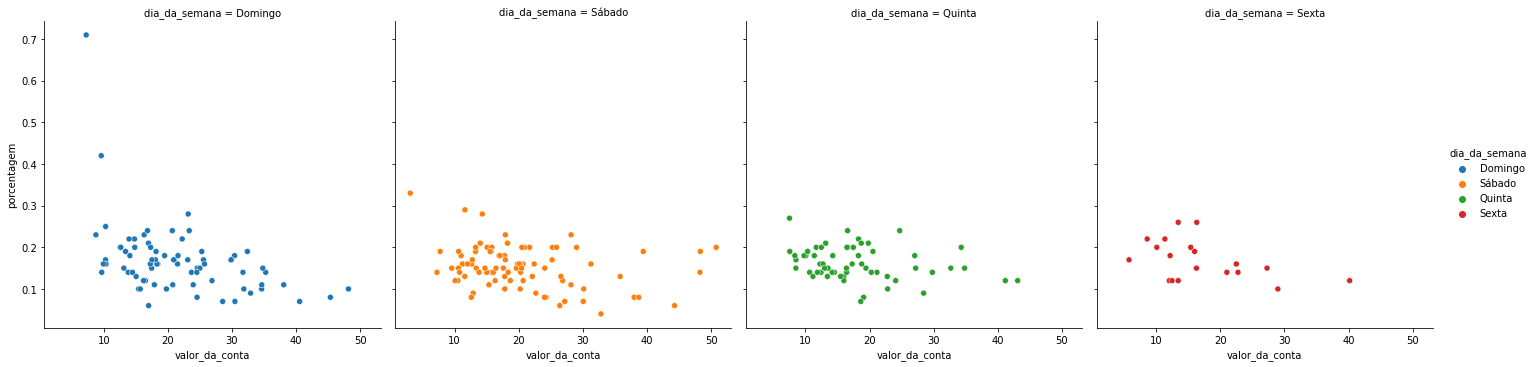

In [61]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=dados)

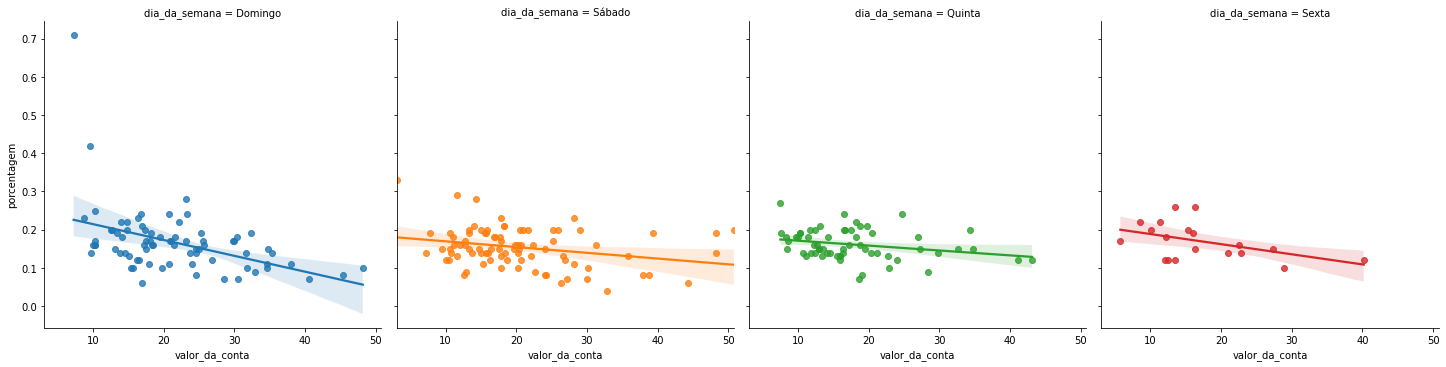

In [62]:
sns.lmplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=dados)

In [67]:
media_geral_gorjetas = dados.gorjeta.mean()
print('A média geral das gorjetas é de {}'.format(media_geral_gorjetas))

A média geral das gorjetas é de 2.9982786885245902


In [68]:
dados.groupby(['dia_da_semana']).mean()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
dia_da_semana,,,,
Domingo,21.410000,3.255132,2.842105,0.166974
Quinta,17.682742,2.771452,2.451613,0.161129
Sexta,17.151579,2.734737,2.105263,0.169474
Sábado,20.441379,2.993103,2.517241,0.153678


In [69]:
dados.groupby(['dia_da_semana']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,0.166974
Quinta,17.682742,2.771452,0.161129
Sexta,17.151579,2.734737,0.169474
Sábado,20.441379,2.993103,0.153678


In [71]:
print('Frequência dos dias')
dados.dia_da_semana.value_counts()

Frequência dos dias


Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

# TESTE DE HIPÓTESE

**H<sup>null</sup>**

>**A distribuição do valor da conta é igual no sabado e no domingo**

**H<sup>alt</sup>**

>**A distribuição do valor da conta não é igual no sabado e no domingo**

In [79]:
valor_conta_domingo = dados.query("dia_da_semana == 'Domingo'").valor_da_conta
valor_conta_sabado = dados.query("dia_da_semana == 'Sábado'").valor_da_conta

In [82]:
r2 = ranksums(valor_conta_domingo, valor_conta_sabado)
print('O valor do p-value é {}'.format(r2.pvalue))

O valor do p-value é 0.3576728477868443


**H<sup>null</sup>**

>**A distribuição do valor da conta é igual no sabado e no domingo**

# ANALISE 4 - HORA DO DIA

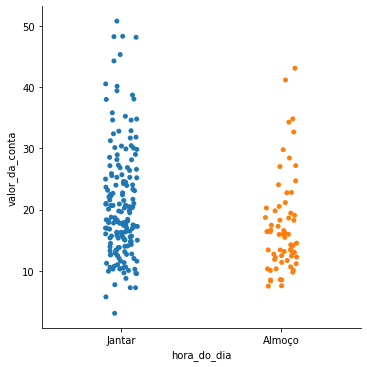

In [83]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', data=dados)

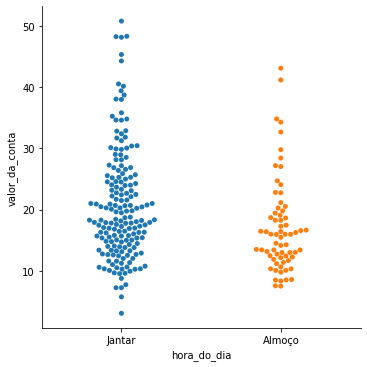

In [85]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', kind='swarm', data=dados)

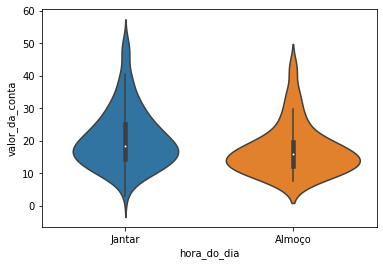

In [86]:
sns.violinplot(x='hora_do_dia', y='valor_da_conta', data=dados)

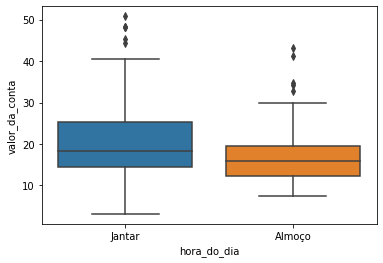

In [87]:
sns.boxplot(x='hora_do_dia', y='valor_da_conta', data=dados)

In [88]:
almoco = dados.query("hora_do_dia == 'Almoço'").valor_da_conta

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


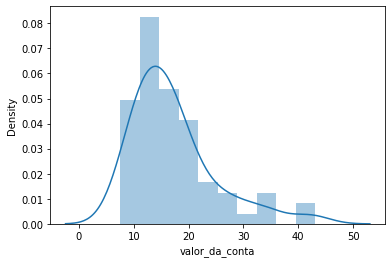

In [89]:
sns.distplot(almoco)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


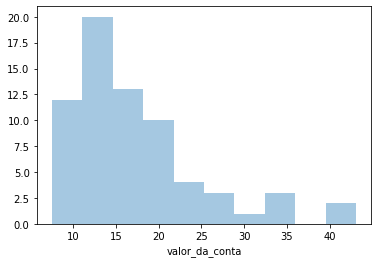

In [90]:
sns.distplot(almoco, kde=False)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


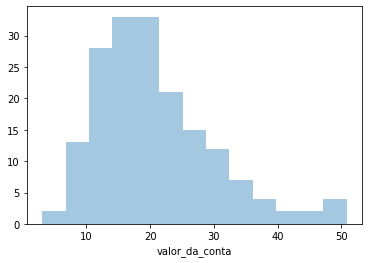

In [93]:
jantar = dados.query("hora_do_dia == 'Jantar'").valor_da_conta
sns.distplot(jantar, kde=False)

In [95]:
dados.groupby(['hora_do_dia']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.168676,2.728088,0.163971
Jantar,20.797159,3.102670,0.159773


# TESTE DE HIPÓTESE

**H<sup>null</sup>**

>**A distribuição do valor da conta é igual no jantar e no almoco**

**H<sup>alt</sup>**

>**A distribuição do valor da conta não é igual no jantar e no almoco**

In [98]:
r2 = ranksums(jantar, almoco)
print('O valor do p-value é {}'.format(r2.pvalue))

O valor do p-value é 0.0011791039723641672


**H<sup>alt</sup>**

>**A distribuição do valor da conta não é igual no jantar e no almoco**

# TESTE DE HIPÓTESE 2

**H<sup>null</sup>**

>**A distribuição da taxa da gorjeta é igual no jantar e no almoco**

**H<sup>alt</sup>**

>**A distribuição da taxa da gorjeta não é igual no jantar e no almoco**

In [100]:
porcentagem_almoco = dados.query("hora_do_dia == 'Almoço'").porcentagem
porcentagem_jantar = dados.query("hora_do_dia == 'Jantar'").porcentagem

In [104]:
r3 = ranksums(porcentagem_almoco, porcentagem_jantar)
print('O valor do p-value é de {}'.format(r3.pvalue))

O valor do p-value é de 0.2602493995587126


**H<sup>null</sup>**

>**A distribuição da taxa da gorjeta é igual no jantar e no almoco**